<a href="https://colab.research.google.com/github/jbakery/Python-Portfolio/blob/main/Perceptron_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

class Perceptron:

  """Perceptron classifier.
  
 Parameters
 
 ---------------------------

eta : float
  Learning rate (between 0.0 and 1.0)

n_iter : int
  Passes over the training dataset.

random_state : int
  Random number generator seed for random weight initialization.

 Attributes

 ------------------------

w_: Id-array
  Weights after fitting.

b_ : Scalar
  Bias unit after fitting.

errors_ : list
  Number of misclassifications (updates) in each epoch.

  """

  def __init__ (self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    """ Fit training data.

  Parameters
  ----------------------

  X : {array-like}, shape = [n_examples, n_featires]
    Training vectors, where n_examples is the number of examples and n_features is the number of features.
  y : array-like, shape = [n_examples]
  Target values.

  Returns
  --------
  self : object

  """
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
    self.b_ = np.float_(0.)
    self.errors_ = []

    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X, y):
       update = self.eta * (target - self.predict(xi))
       self.w_ += update * xi
       self.b_ += update
       errors += int(update != 0.0)
       self.errors_.append(errors)
      return self

  def net_input (self, X):
    """Calculate net input"""
    return np.dot(X, self.w_) + self.b_

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.net_input(X)>= 0.0, 1, -1)






In [3]:
"Training the Perceptron model"

import os
import pandas as pd

s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('FROM URL:', s)

df = pd.read_csv(s, header=None, encoding='utf-8')

df.tail()

FROM URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


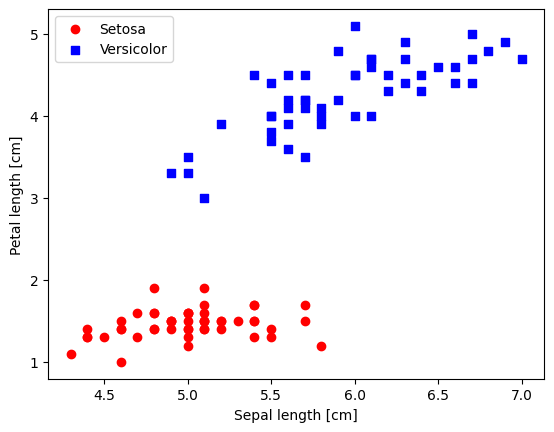

In [4]:
import matplotlib.pyplot as plt

""" Here we can see that a linear descision boundary should be sufficient to separate the Setosa from Versicolor flowers.
A linear classifier such as the perceptron should be able to classify the flowers in this dataset perfectly.""" 

# Select Setosa and Versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# Extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# Plot data
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='s', label='Versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()



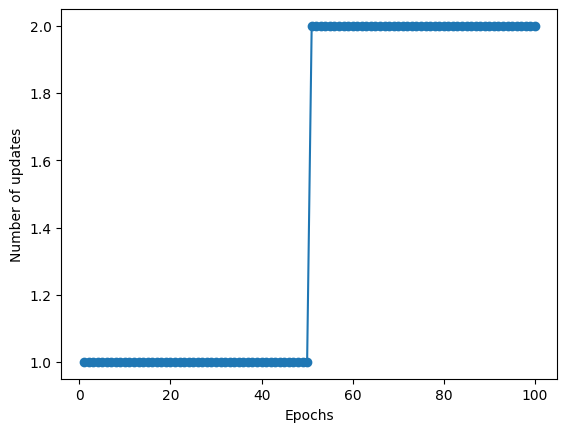

In [5]:
#Model Training


""" This model has given us an unexpected result the number of updates and epochs did not converge as expected. 
    Convergence is the biggest problem of the Perceptron. """

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [6]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):  

  # Setup marker generator and color map

  markers = ('o', 's', '^', 'v', '<')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # plot the decision surface

  x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() +1
  x2_min, x2_max = X[:,0].min() - 1, X[:, 1].max() +1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                       np.arange(x2_min, x2_max, resolution))
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  #plot class examples

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=f'Class {cl}', edgecolor='black' )


                

                

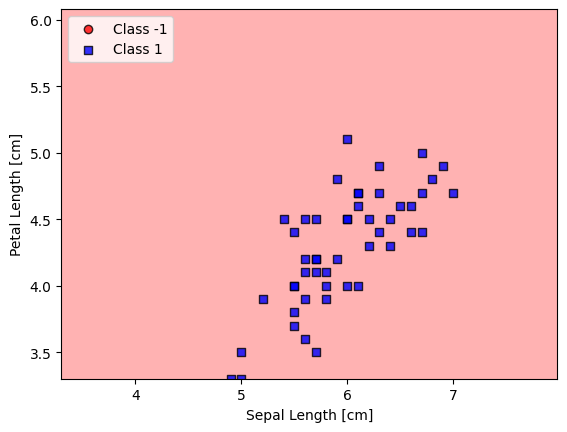

' No meaningful decision boundary produced '

In [7]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal Length [cm]')
plt.ylabel('Petal Length [cm]')
plt.legend(loc='upper left')
plt.show()

""" No meaningful decision boundary produced """